## Obtaining the Efficient Frontier in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
%matplotlib inline #feature provided by ipython(exclusively for jupyter notebooks) - facilitates plotting matplotlib graphs 
#just below code cells and storing them in the notebook document

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start= '2010-1-1')['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2021-08-18,143.300003,4400.270020
2021-08-19,144.990005,4405.799805
2021-08-20,145.089996,4441.669922
2021-08-23,144.350006,4479.529785
2021-08-24,143.279999,4487.270020


<AxesSubplot:xlabel='Date'>

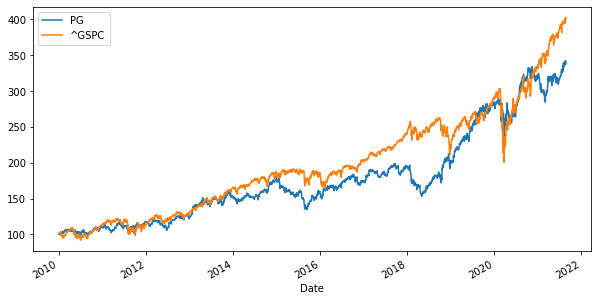

In [5]:
#Normalizing to 100
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250 #for 250 working days

PG       0.103882
^GSPC    0.118756
dtype: float64

In [12]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.028803,0.017199
^GSPC,0.017199,0.029820


In [13]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.586863
^GSPC,0.586863,1.000000


In [15]:
num_assets = len(assets)
num_assets

2

In [24]:
arr = np.random.random(2)
arr

array([0.69553114, 0.70972968])

In [17]:
arr[0] + arr[1] #not always equal to 1

1.0312442870533933

In [26]:
weights = np.random.random(num_assets)
weights = weights / np.sum(weights)
weights

array([0.5115275, 0.4884725])

In [27]:
weights[0] + weights[1] #sum will always equal 1

1.0

### Expected Portfolio Return

In [28]:
np.sum(weights * log_returns.mean()) * 250

0.111147619050628

### Expected Portfolio Variance

In [29]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.023247053959499775

Breakdown

In [34]:
log_returns.cov() *250

,PG,^GSPC
PG,0.028803,0.017199
^GSPC,0.017199,0.029820


In [36]:
weights

array([0.5115275, 0.4884725])

In [37]:
np.dot(log_returns.cov() * 250, weights)

# [0.5115275 * 0.028803 + 0.4884725 * 0.017199 , 0.5115275 * 0.017199 + 0.4884725 * 0.029820]

array([0.02313495, 0.02336445])

In [39]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

# [0.02313495 * 0.5115275 + 0.02336445 * 0.4884725]

0.023247053959499775

### Expected Portfolio Volatility

In [40]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.15246984606636085

WE ARE NOT CONSIDERING 1,000 DIFFERENT INVESTMENTS,  

WE ARE CONSIDERING 1,000 DIFFERENT COMBINATIONS OF THE SAME ASSETS

In [47]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights  * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilties = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities
    

(array([0.11384526, 0.11570555, 0.10408302, 0.10818452, 0.10472637,
        0.11017208, 0.11334704, 0.11642542, 0.11108122, 0.11028011,
        0.10831314, 0.10921616, 0.10927701, 0.11786186, 0.11765166,
        0.1075151 , 0.11198542, 0.10666363, 0.10991793, 0.11099328,
        0.11278731, 0.1131142 , 0.11864999, 0.11017326, 0.1050789 ,
        0.10989526, 0.11073825, 0.11509481, 0.10759817, 0.10805741,
        0.11367278, 0.11100729, 0.11349636, 0.1111031 , 0.11437996,
        0.11130162, 0.11439243, 0.10951563, 0.10985343, 0.10516453,
        0.10551963, 0.11225877, 0.10996002, 0.11452462, 0.10490836,
        0.10871204, 0.10842483, 0.1147501 , 0.11424905, 0.10557854,
        0.11235289, 0.1151259 , 0.10430049, 0.11694356, 0.11596284,
        0.1163634 , 0.11796445, 0.11182387, 0.11311682, 0.11039146,
        0.10451872, 0.10851522, 0.11388204, 0.10786291, 0.11365008,
        0.10766392, 0.11194583, 0.11363813, 0.11751371, 0.11630089,
        0.10795337, 0.11587621, 0.11454347, 0.10

In [48]:
portfolios = pd.DataFrame({'Return' : pfolio_returns, 'Volatility' : pfolio_volatilities})

In [49]:
portfolios.head()

,Return,Volatility
0,0.113845,0.155329
1,0.115706,0.160194
2,0.104083,0.168800
3,0.108185,0.155296
4,0.104726,0.166022


In [51]:
portfolios.head()

,Return,Volatility
0,0.113845,0.155329
1,0.115706,0.160194
2,0.104083,0.168800
3,0.108185,0.155296
4,0.104726,0.166022


Text(0, 0.5, 'Expected Return')

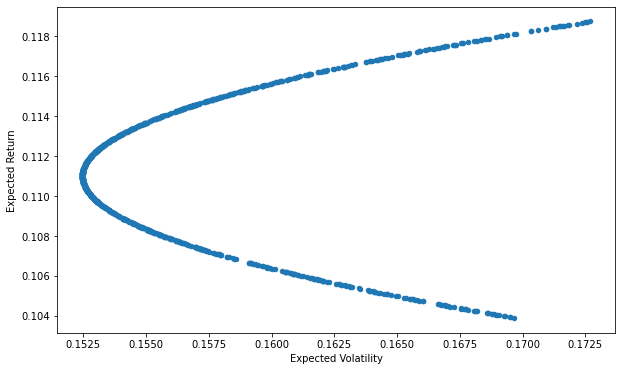

In [52]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')